# Car Sales Regression

****Predicting Price of Cars through Regression****
> Throughout this project, we will be building a model to predict car sales prices using a handful of features.

## 1. Project Definition

> This is a project I worked on while beginning my data science journey.  The project was a part of ZeroToMastery's online course.
> 
> This is an example of a practical use case of regression analysis, where you can use a model that has a high degree of predictive accuracy to identify potential undervalued assets that an organization or individual could purchase then resell at a profit.  Similar methods have been utilized across many industries.

## 2. Data

> The dataset has 1,000 observations, four features, and one target (price).  There are missing data points that must be addressed.

## 3. Evaluation

> We'll consider an R-Squared of 0.5 to be a good test to see if this project would have potential as a predictive algorithm with additional data & features.

## 4. Feature Definitions

> * **Make** - The car's brand (Honda, BMW, Toyota, etc)
> 
> * **Colour** - The color of the car
> 
> * **Odometer (KM)** - How many KM the car has been driven, a proxy for expected reliability and lifespan
> 
> * **# of Doors** - Number of doors the car has, a proxy for the approximate size of the car

## 5. Modeling

### 5.1 Import Tools

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

In [4]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


### 5.2 General Exploratory Data Analysis

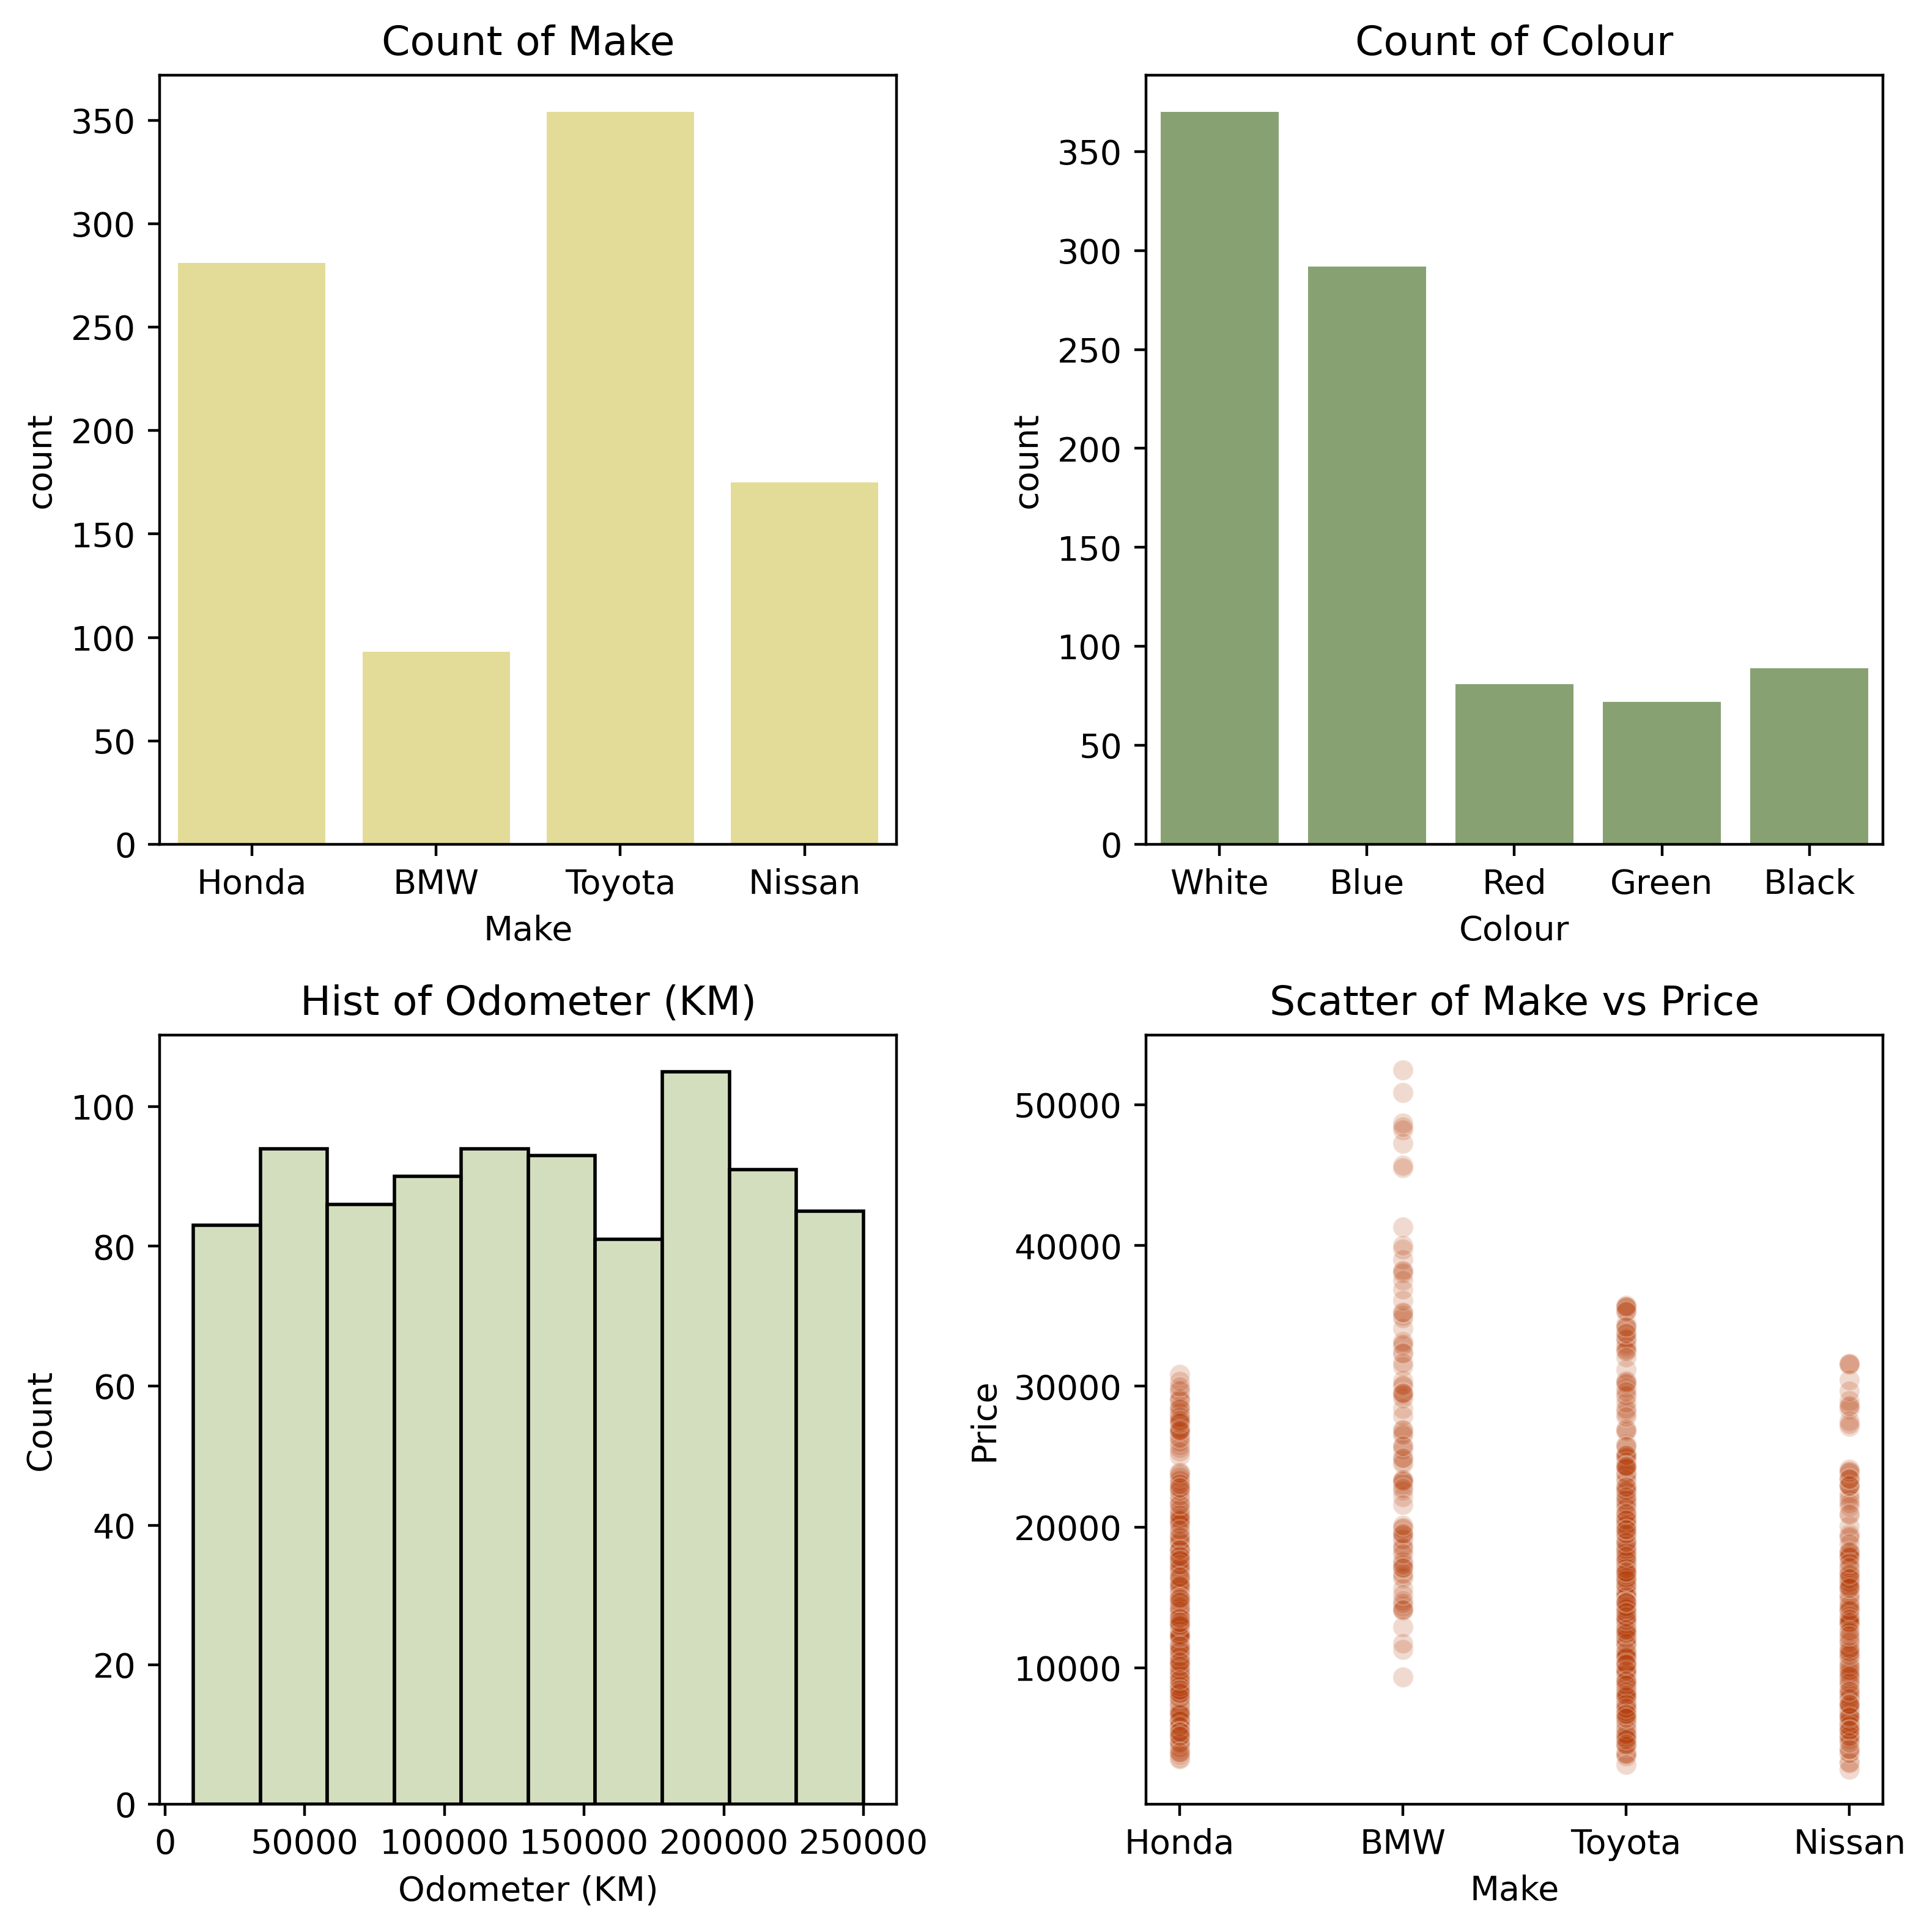

In [100]:
# Create the four figures
fig, axes = plt.subplots(2, 2, figsize=(8,8), dpi=400)

# Create the plots individually
sns.countplot(data = car_sales, x = car_sales["Make"], ax = axes[0,0], color = '#F0E68C')
axes[0,0].set_title("Count of Make")

sns.countplot(data = car_sales, x = car_sales["Colour"], ax = axes[0,1], color = '#87A96B')
axes[0,1].set_title("Count of Colour")

sns.histplot(data = car_sales, x = car_sales["Odometer (KM)"], ax = axes[1,0], bins=10, color = '#C3D3A8')
axes[1,0].set_title("Hist of Odometer (KM)")

sns.scatterplot(data = car_sales, x = car_sales["Make"], y = car_sales["Price"], ax = axes[1,1], alpha = 0.2, color = '#B7410E')
axes[1,1].set_title("Scatter of Make vs Price")

plt.tight_layout()

plt.show();

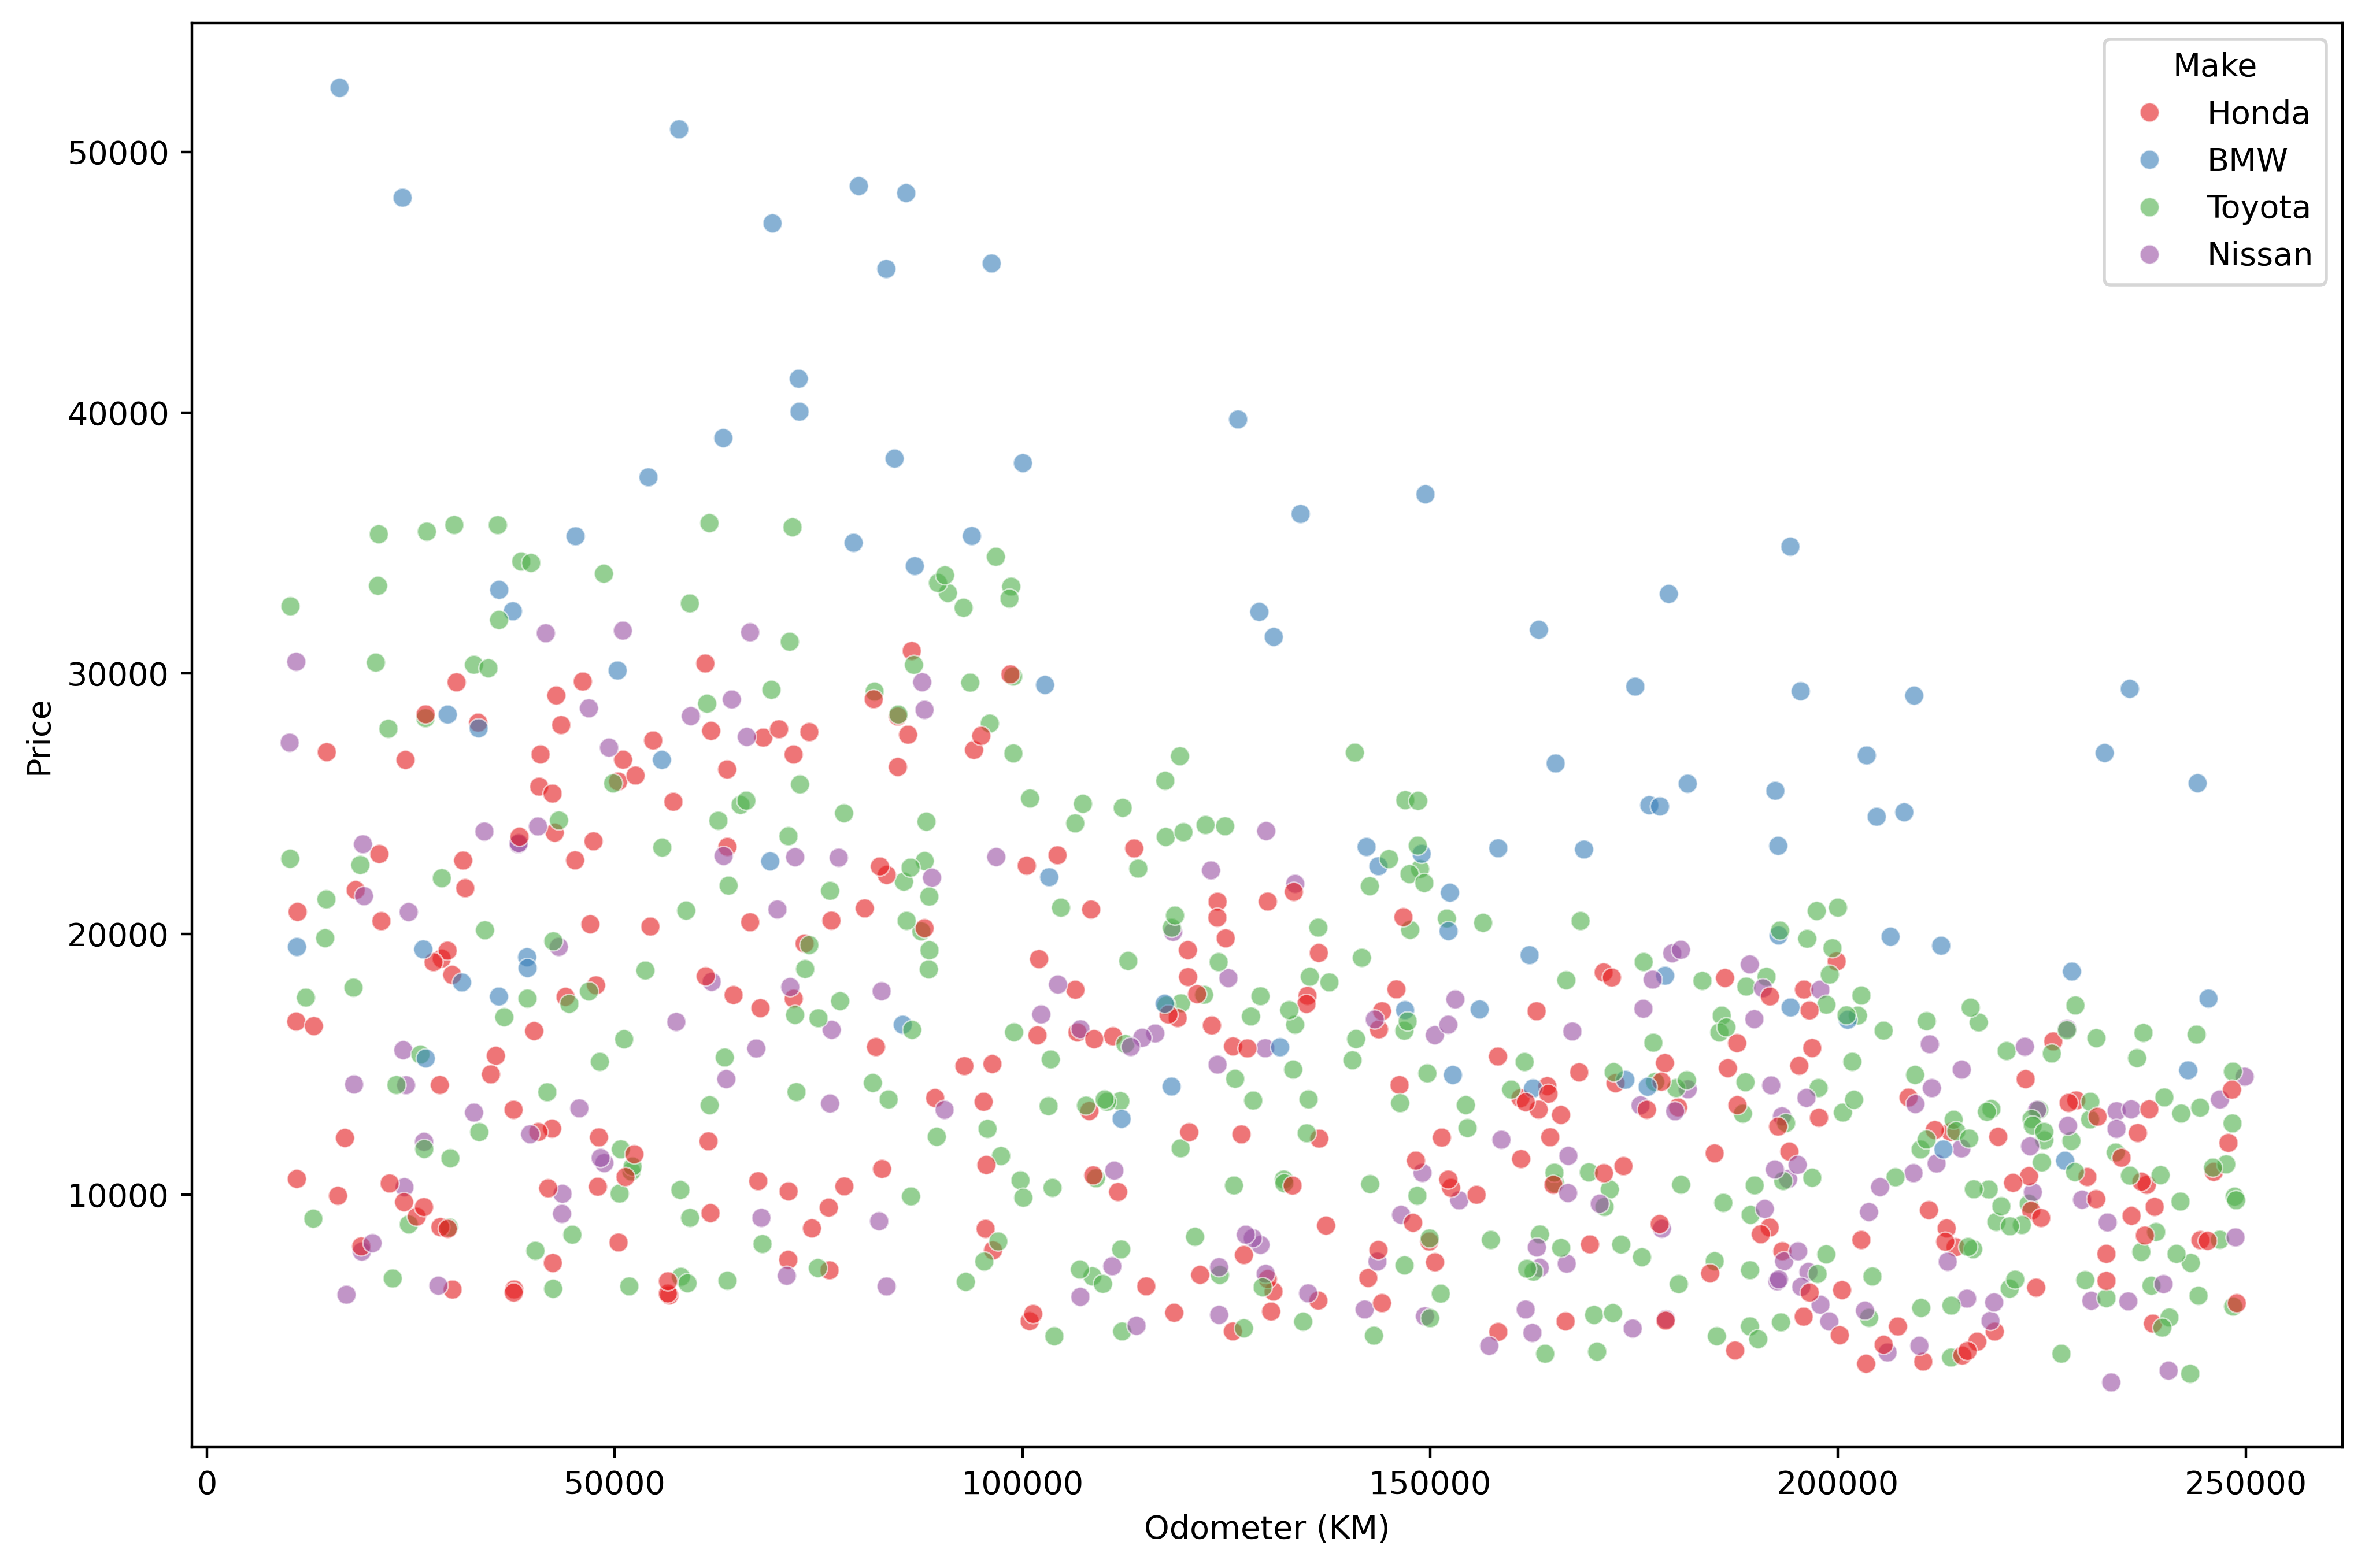

In [40]:
plt.figure(figsize=(12,8), dpi=400)

sns.scatterplot(data=car_sales,
                x=car_sales["Odometer (KM)"],
                y=car_sales["Price"],
                hue=car_sales["Make"],
                palette="Set1",
                alpha=0.6);

### 5.3 Missing Data

In [41]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [45]:
car_sales.dropna(subset = ["Price"], axis = 0, inplace = True)

In [46]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

### 5.4 Preparing Pipelines

In [47]:
car_sales.Make.unique(), car_sales.Colour.unique()

(array(['Honda', 'BMW', 'Toyota', 'Nissan', nan], dtype=object),
 array(['White', 'Blue', 'Red', 'Green', nan, 'Black'], dtype=object))

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [50]:
# Create features

categorical_features = ["Make","Colour"]
numerical_features = ["Odometer (KM)"]
door_feature = ["Doors"]

# Create transformers

categorical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
        ("onehot", OneHotEncoder(handle_unknown = "ignore"))
    ]
)

numerical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "median"))
    ]
)

door_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))
    ]
)

# Setup preprocessor

preprocessor = ColumnTransformer(
    transformers = [
        ("categorical", categorical_transformer, categorical_features),
        ("numerical", numerical_transformer, numerical_features),
        ("door", door_transformer, door_feature)
    ]
)

### 5.5 Train Test Split

In [51]:
X = car_sales.drop("Price", axis = 1)

y = car_sales["Price"]

In [52]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 4), (190, 4), (760,), (190,))

### 5.6 Test Models

In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [57]:
reg_models = {
    "Ridge":Ridge(),
    "SVR_lin":SVR(kernel="linear"),
    "SVR_rbf":SVR(kernel="rbf"),
    "RFR":RandomForestRegressor(),
    "Lasso":Lasso(max_iter=5000)
}

reg_results = {}

In [67]:
np.random.seed(42)

for model_name, model in reg_models.items():
    model_pipeline = Pipeline(
        steps = [
            ("preprocessor",preprocessor),
            ("scaler",StandardScaler()),
            ("model",model)
        ]
    )

    print(f'Fitting {model_name}...')
    model_pipeline.fit(X_train, y_train)

    print(f'Scoring {model_name}...')
    reg_results[model_name] = model_pipeline.score(X_test, y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_lin...
Scoring SVR_lin...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RFR...
Scoring RFR...
Fitting Lasso...
Scoring Lasso...


In [68]:
reg_results

{'Ridge': 0.25373670023028005,
 'SVR_lin': 0.043424287378737714,
 'SVR_rbf': -0.0030588062614465006,
 'RFR': 0.21499206512526559,
 'Lasso': 0.2537831105504751}

**Ridge and Lasso performed best, so let's explore them further.**

In [69]:
np.random.seed(42)

ridge_pipeline = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Ridge())])

ridge_pipeline.fit(X_train, y_train)

y_preds_ridge = ridge_pipeline.predict(X_test)

In [70]:
np.random.seed(42)

lasso_pipeline = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Lasso(max_iter=5000))])

lasso_pipeline.fit(X_train, y_train)

y_preds_lasso = lasso_pipeline.predict(X_test)

**We're going to calculate some metrics now.**

In [72]:
def metrics_scoring(y_test, y_preds):
    mse = mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)

    scores = {
    "Mean Squared Error":mse.round(4),
    "Mean Absolute Error":mae.round(4),
    "R-Squared Score":r2
    }

    return scores

In [73]:
metrics_scoring(y_test,y_preds_lasso)

{'Mean Squared Error': 49966453.8407,
 'Mean Absolute Error': 5714.2253,
 'R-Squared Score': 0.2537831105504751}

In [74]:
metrics_scoring(y_test,y_preds_ridge)

{'Mean Squared Error': 49969561.4615,
 'Mean Absolute Error': 5714.3948,
 'R-Squared Score': 0.25373670023028005}

**These are nearly identical results.**

### 5.7 Hyperparameter Tuning

**Ridge Tuning**

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)

ridge_reg_grid = {
    'model__alpha':np.logspace(1.5, 10, 1000),
    'model__fit_intercept':[True, False]
}

ridge_reg = Pipeline(
    steps = [
        ("preprocessor",preprocessor),
        ("scaler",StandardScaler()),
        ("model",Ridge())
    ]
)

ridge_search = RandomizedSearchCV(
    estimator = ridge_reg,
    param_distributions = ridge_reg_grid,
    n_iter = 50,
    cv = 5,
    verbose = 1)

ridge_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Make',
                                                                                'Colour']),
                                                                              ('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Odom...
       6.37241871e+09, 6.49849535e+09, 6.62706639e+09, 6.75818117e+09,
       6.89189002e+09, 7.02824426e+09, 7.16729624e+09, 7.30909933e+09,
       7.45370795e+09, 7.60117762e+09, 7.75156493e+09, 7.90492762e+09,
       8.06132455e+09, 8.22081576e+09, 8.38346245e+09, 8.54932707e+09,
       8.71847327e+09, 8.89096599e+09, 9.06687143e+09, 9.24625712e+09,
       9.42919190e+09, 9.61574600e+09, 9.80599103e+09, 1.00000000e+10]),
                                        'model__fit_intercept': [True, False]},
                   verbose=1)

In [81]:
ridge_search.score(X_test, y_test)

0.25788548308669557

In [90]:
y_preds_ridge_search = ridge_search.predict(X_test)

In [82]:
ridge_search.best_params_

{'model__fit_intercept': True, 'model__alpha': 54.73161183776532}

**Lasso Tuning**

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)

lasso_reg_grid = {
    'model__alpha':np.logspace(1.5, 10, 1000),
    'model__fit_intercept':[True, False]
}

lasso_reg = Pipeline(
    steps = [
        ("preprocessor",preprocessor),
        ("scaler",StandardScaler()),
        ("model",Lasso())
    ]
)

lasso_search = RandomizedSearchCV(
    estimator = lasso_reg,
    param_distributions = lasso_reg_grid,
    n_iter = 50,
    cv = 5,
    verbose = 1)

lasso_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Make',
                                                                                'Colour']),
                                                                              ('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Odom...
       6.37241871e+09, 6.49849535e+09, 6.62706639e+09, 6.75818117e+09,
       6.89189002e+09, 7.02824426e+09, 7.16729624e+09, 7.30909933e+09,
       7.45370795e+09, 7.60117762e+09, 7.75156493e+09, 7.90492762e+09,
       8.06132455e+09, 8.22081576e+09, 8.38346245e+09, 8.54932707e+09,
       8.71847327e+09, 8.89096599e+09, 9.06687143e+09, 9.24625712e+09,
       9.42919190e+09, 9.61574600e+09, 9.80599103e+09, 1.00000000e+10]),
                                        'model__fit_intercept': [True, False]},
                   verbose=1)

In [85]:
lasso_search.score(X_test, y_test)

0.26840256886356584

In [86]:
y_preds_lasso_search = lasso_search.predict(X_test)

In [87]:
metrics_scoring(y_test,y_preds_lasso_search)

{'Mean Squared Error': 48987539.4,
 'Mean Absolute Error': 5656.9387,
 'R-Squared Score': 0.26840256886356584}

In [91]:
metrics_scoring(y_test,y_preds_ridge_search)

{'Mean Squared Error': 49691760.2351,
 'Mean Absolute Error': 5696.026,
 'R-Squared Score': 0.25788548308669557}

In [88]:
metrics_scoring(y_test,y_preds_lasso)

{'Mean Squared Error': 49966453.8407,
 'Mean Absolute Error': 5714.2253,
 'R-Squared Score': 0.2537831105504751}

In [89]:
metrics_scoring(y_test,y_preds_ridge)

{'Mean Squared Error': 49969561.4615,
 'Mean Absolute Error': 5714.3948,
 'R-Squared Score': 0.25373670023028005}

## 6. Evaluation

**The Lasso model performed the best of each of the models by a small margin.**

**We're still far away from the 0.50 R-Squared benchmark that we determined earlier.  Based on those evaluation standards, I wouldn't move ahead with this project without getting access to more/better data.**

In [94]:
# Save the model
from joblib import dump
dump(lasso_search, "car_price_lasso.joblib")

['car_price_lasso.joblib']